# Mixed design of experiments

In this example we are going to build a mixed deterministic / random design of experiments in which which levels are defined from the probabilistic distribution of the input random vector.

The example here is an axial design of experiments where levels are proportional to the standard deviation of each component of the random input vector, and centered on the mean vector of the random input vector.

Be careful to remain within the range of the distribution if the latter is bounded!

In [31]:
from __future__ import print_function
import openturns as ot
import math as m

In [32]:
# Define the underlying random vector
dim = 2
R = ot.CorrelationMatrix(dim)
distribution = ot.Normal([2.0, 3.0], [0.5, 2.0], R)
rv = ot.RandomVector(distribution)

In [33]:
# Define the structure of the design of experiments
levels = [1.0, 2.0, 3.0]
experiment = ot.Axial(dim, levels)
sample = experiment.generate()

In [34]:
# Scale the design proportionnally to the standard deviation of each component
scaling = list(map(lambda i:m.sqrt(rv.getCovariance()[i,i]), range(dim)))
print('scaling=', scaling)
sample *= scaling

scaling= [0.5, 2.0]


In [35]:
# Translate the design at the mean
center = rv.getMean()
print('center=', center)
sample += center

center= [2,3]


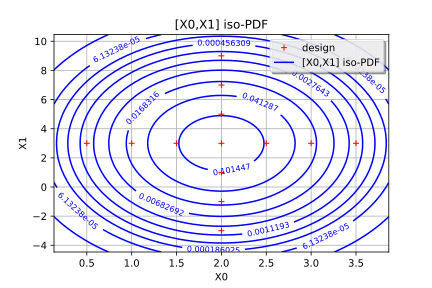

In [36]:
# Draw the design as well as the distribution iso-values
graph = distribution.drawPDF()
doe = ot.Cloud(sample)
doe.setColor('red')
doe.setLegend('design')
graph.add(doe)
graph